In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/home/brito/Documentos/Dev/financas_python/regressao/original.xlsx')

In [3]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [4]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [5]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [6]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [7]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

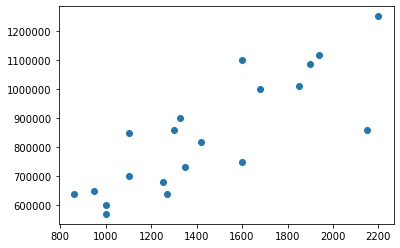

In [8]:
plt.scatter(X,Y)
plt.show()

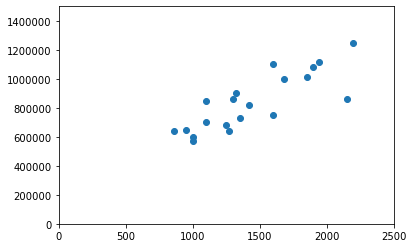

In [9]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

In [15]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

## Regressão
Aqui podemos observar alguns resultados estatísticos. O que é importante para nós é entender o significado das coisas. Por exemplo, na segunda tabela o valor do coeficiente (coef) da constante (const) representa onde a linha da regressão prevista terá inicio no seu eixo Y.

Depois ainda no coeficiente (coef) porém com o tamanho da casa (House Size), vemos que para cada metro quadrado esperamos um aumento de 401.91 dólares, com um erro quadrado de 65.243 pra mais ou pra menos.

In [16]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.13e-06
Time:                        19:21:26   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Aqui estaremos fazendo uma simulação para observarmos o Y esperado, segundo nossas métricas

In [18]:
260800 + 402 * 1000
#preco_inicio + variacao + m²

662800

Outro jeito de encotrar os valores que esperamos é através da lib stats

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [20]:
slope

401.91628631922595

In [21]:
intercept

260806.2360560964

In [24]:
r_value ** 2

0.678279986579124

In [25]:
p_value

8.129642377231308e-06

In [26]:
std_err

65.24299510636492